# Prediction of Bamboo Leaf Ash Compressive Strength

## Loading the dataset

In [1]:
import pandas as pd

df = pd.read_excel("C:/Users/USER/Documents/BLA.xlsx")
df.head ()

,W/B ratio,% Addition,Cement,mix ratio,BLA,Density of Concrete,Fine Agg.,Coarse Agg.,Water,SiO2,Al2O3,Fe2O3,CaO,LoI,Curing Age,Compressive strength,Superplasticizer,Reference Link
0,0.49,0.0,365.0,NaN,0.00,2389.0,778.0,1086.0,196.74,NaN,NaN,NaN,NaN,NaN,3,17.03,0.0,https://www.researchgate.net/publication/35737...
1,0.49,0.0,365.0,NaN,0.00,2389.0,778.0,1086.0,196.74,NaN,NaN,NaN,NaN,NaN,7,29.28,0.0,https://www.researchgate.net/publication/35737...
2,0.49,0.0,365.0,NaN,0.00,2389.0,778.0,1086.0,196.74,NaN,NaN,NaN,NaN,NaN,28,37.70,0.0,https://www.researchgate.net/publication/35737...
3,0.49,0.0,365.0,NaN,0.00,2389.0,778.0,1086.0,196.74,NaN,NaN,NaN,NaN,NaN,56,39.81,0.0,https://www.researchgate.net/publication/35737...
4,0.49,5.0,346.5,NaN,18.25,2383.0,778.0,1086.0,196.74,65.66,6.41,4.28,15.22,9.65,3,16.84,0.0,https://www.researchgate.net/publication/35737...


## Importing the necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

## Initial Data ExploratIon and Data Cleaning 

In [3]:
#Checking the number of rows and columns

rows, cols = df.shape
print("This data has {} rows and {} columns".format(rows, cols))

This data has 645 rows and 18 columns


In [4]:
df.dtypes

W/B ratio               float64
% Addition              float64
Cement                  float64
mix ratio                object
BLA                     float64
Density of Concrete     float64
Fine Agg.               float64
Coarse Agg.             float64
Water                   float64
SiO2                    float64
Al2O3                   float64
Fe2O3                   float64
CaO                     float64
LoI                     float64
Curing Age                int64
Compressive strength    float64
Superplasticizer        float64
Reference Link           object
dtype: object

In [5]:
df.columns

Index(['W/B ratio', '% Addition', 'Cement', 'mix ratio', 'BLA',
       'Density of Concrete', 'Fine Agg.', 'Coarse Agg.', 'Water', 'SiO2',
       'Al2O3', 'Fe2O3', 'CaO', 'LoI', 'Curing Age', 'Compressive strength',
       'Superplasticizer', 'Reference Link'],
      dtype='object')

### Renaming the columns

In [6]:
#Renaming columns method

df = df.rename(columns={'W/B ratio': 'w/b_ratio', 'Density of Concrete':'concrete_density', 'Fine Agg.':'fine_agg', 'Coarse Agg.':'coarse_agg', 'Cement':'cement','% Addition':'percentage_addition', 'Compressive strength': 'compressive_strength', 'Curing Age':'curing_age', 'Super plasticizer':'super_plasticizer' })

In [7]:
df.head()

,w/b_ratio,percentage_addition,cement,mix ratio,BLA,concrete_density,fine_agg,coarse_agg,Water,SiO2,Al2O3,Fe2O3,CaO,LoI,curing_age,compressive_strength,Superplasticizer,Reference Link
0,0.49,0.0,365.0,NaN,0.00,2389.0,778.0,1086.0,196.74,NaN,NaN,NaN,NaN,NaN,3,17.03,0.0,https://www.researchgate.net/publication/35737...
1,0.49,0.0,365.0,NaN,0.00,2389.0,778.0,1086.0,196.74,NaN,NaN,NaN,NaN,NaN,7,29.28,0.0,https://www.researchgate.net/publication/35737...
2,0.49,0.0,365.0,NaN,0.00,2389.0,778.0,1086.0,196.74,NaN,NaN,NaN,NaN,NaN,28,37.70,0.0,https://www.researchgate.net/publication/35737...
3,0.49,0.0,365.0,NaN,0.00,2389.0,778.0,1086.0,196.74,NaN,NaN,NaN,NaN,NaN,56,39.81,0.0,https://www.researchgate.net/publication/35737...
4,0.49,5.0,346.5,NaN,18.25,2383.0,778.0,1086.0,196.74,65.66,6.41,4.28,15.22,9.65,3,16.84,0.0,https://www.researchgate.net/publication/35737...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   w/b_ratio             620 non-null    float64
 1   percentage_addition   645 non-null    float64
 2   cement                411 non-null    float64
 3   mix ratio             110 non-null    object 
 4   BLA                   432 non-null    float64
 5   concrete_density      194 non-null    float64
 6   fine_agg              411 non-null    float64
 7   coarse_agg            405 non-null    float64
 8   Water                 405 non-null    float64
 9   SiO2                  532 non-null    float64
 10  Al2O3                 533 non-null    float64
 11  Fe2O3                 533 non-null    float64
 12  CaO                   533 non-null    float64
 13  LoI                   478 non-null    float64
 14  curing_age            645 non-null    int64  
 15  compressive_strength  6

### Dropping Irrelevant Columns

In [9]:
#Dropping the Concrete density, mix ration and Reference link columns

df = df.drop(['concrete_density', 'LoI', 'mix ratio', 'Reference Link'], axis = 1)

In [10]:
df.columns

Index(['w/b_ratio', 'percentage_addition', 'cement', 'BLA', 'fine_agg',
       'coarse_agg', 'Water', 'SiO2', 'Al2O3', 'Fe2O3', 'CaO', 'curing_age',
       'compressive_strength', 'Superplasticizer'],
      dtype='object')

In [11]:
#Showing the percentage of null values

for col in df.columns:
    pct_na = np.mean(df[col].isna())
    print('{} has {}% NA values'.format(col, pct_na))

w/b_ratio has 0.03875968992248062% NA values
percentage_addition has 0.0% NA values
cement has 0.3627906976744186% NA values
BLA has 0.3302325581395349% NA values
fine_agg has 0.3627906976744186% NA values
coarse_agg has 0.37209302325581395% NA values
Water has 0.37209302325581395% NA values
SiO2 has 0.17519379844961241% NA values
Al2O3 has 0.17364341085271318% NA values
Fe2O3 has 0.17364341085271318% NA values
CaO has 0.17364341085271318% NA values
curing_age has 0.0% NA values
compressive_strength has 0.0% NA values
Superplasticizer has 0.0% NA values


In [12]:
# Removing rows with empty values

df.dropna(subset=['fine_agg', 'SiO2','Water'], inplace=True)
df.shape

(350, 14)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350 entries, 4 to 644
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   w/b_ratio             350 non-null    float64
 1   percentage_addition   350 non-null    float64
 2   cement                350 non-null    float64
 3   BLA                   350 non-null    float64
 4   fine_agg              350 non-null    float64
 5   coarse_agg            350 non-null    float64
 6   Water                 350 non-null    float64
 7   SiO2                  350 non-null    float64
 8   Al2O3                 350 non-null    float64
 9   Fe2O3                 350 non-null    float64
 10  CaO                   350 non-null    float64
 11  curing_age            350 non-null    int64  
 12  compressive_strength  350 non-null    float64
 13  Superplasticizer      350 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 41.0 KB


## Exploratory Data Analysis

In [14]:
#checking the number of duplicates
sum(df.duplicated())

1

In [15]:
# Dropping the duplicated rows
df = df.drop_duplicates()

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
w/b_ratio,349.0,0.517708,0.091246,0.300000,0.490000,0.500000,0.600000,0.6500
percentage_addition,349.0,12.435530,10.982719,0.000000,5.000000,10.000000,16.000000,75.0000
cement,349.0,352.803471,112.631191,86.772500,291.428571,325.714286,378.600000,770.0000
BLA,349.0,46.156210,41.561803,0.000000,17.142857,39.161829,66.071600,260.3175
fine_agg,349.0,876.446206,387.868227,633.228571,684.440000,685.714286,749.205714,2084.0000
coarse_agg,349.0,986.484076,633.333883,0.000000,396.674286,1180.000000,1371.428571,2592.0000
Water,349.0,193.954487,28.950888,146.275800,171.420000,189.035000,208.254000,300.0000
SiO2,349.0,54.388842,19.165505,2.100000,43.000000,62.030000,72.250000,75.9000
Al2O3,349.0,9.115570,10.989300,0.080000,3.320000,4.080000,10.100000,32.0000
Fe2O3,349.0,6.306751,6.086465,1.000000,1.340000,3.341000,16.100000,16.4600


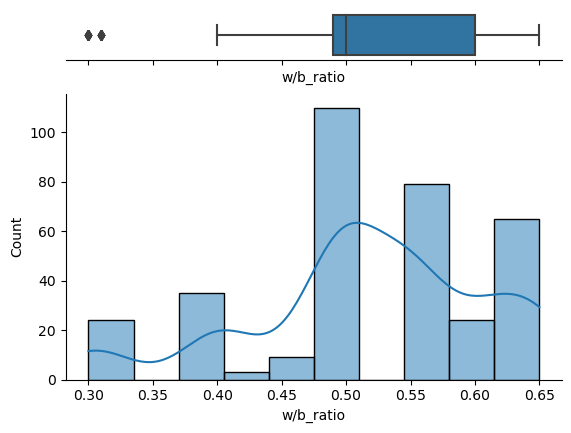

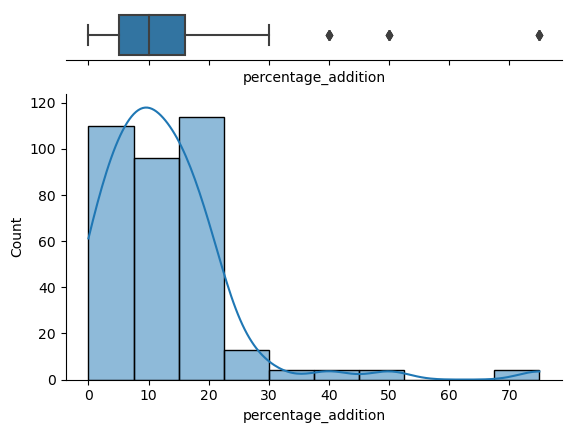

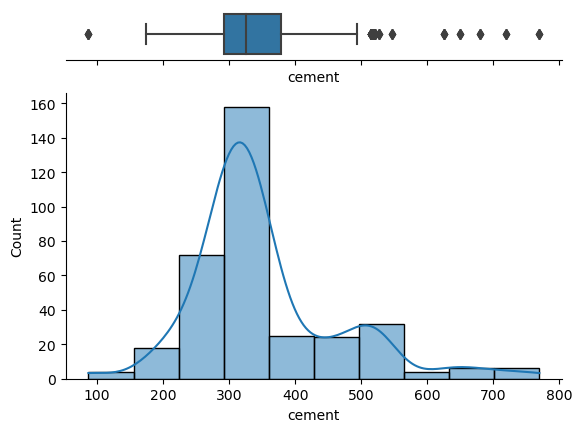

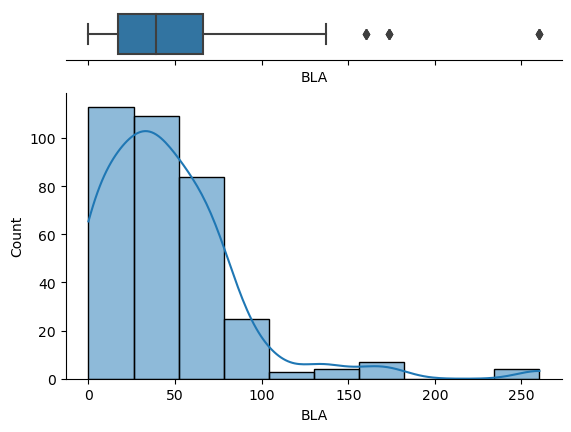

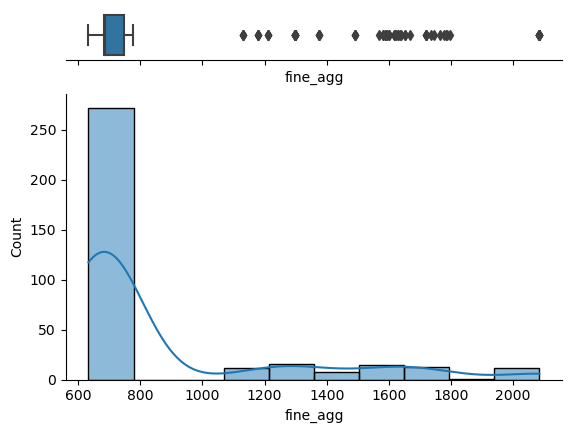

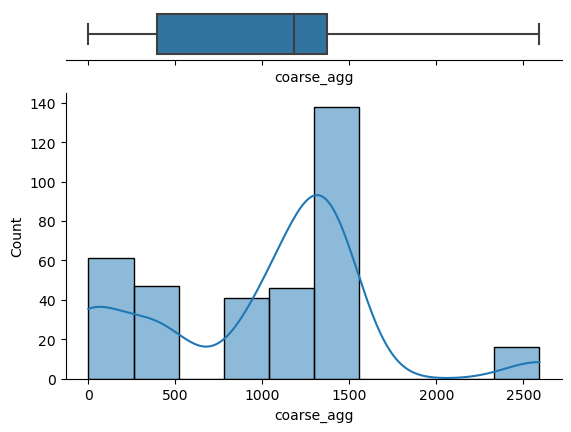

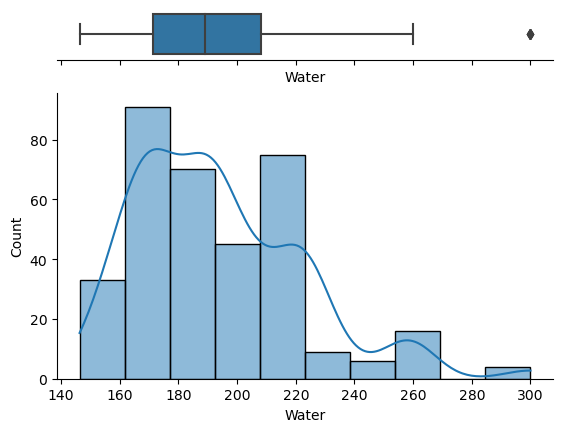

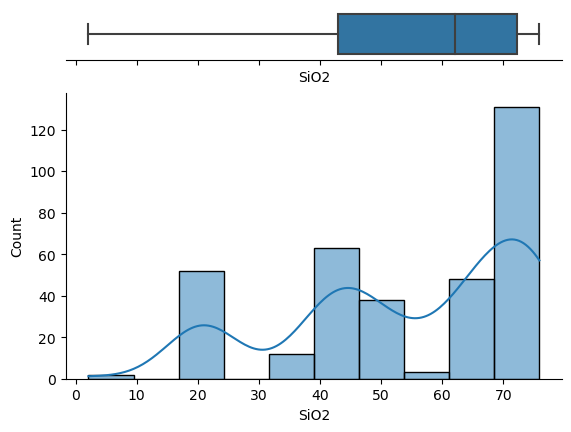

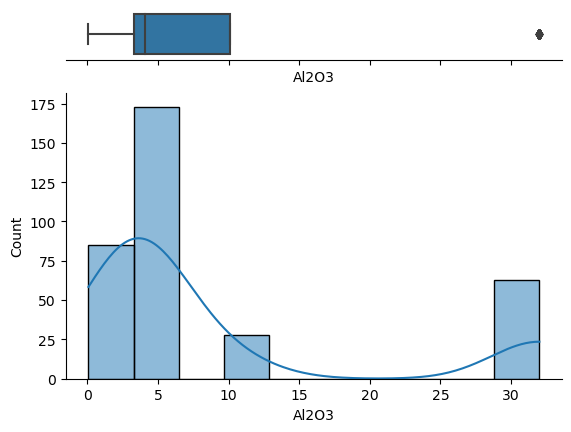

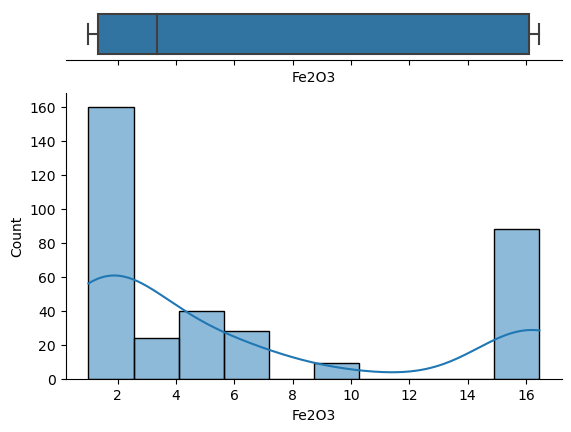

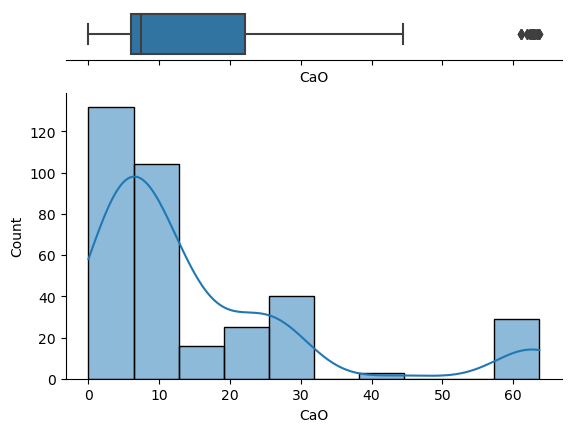

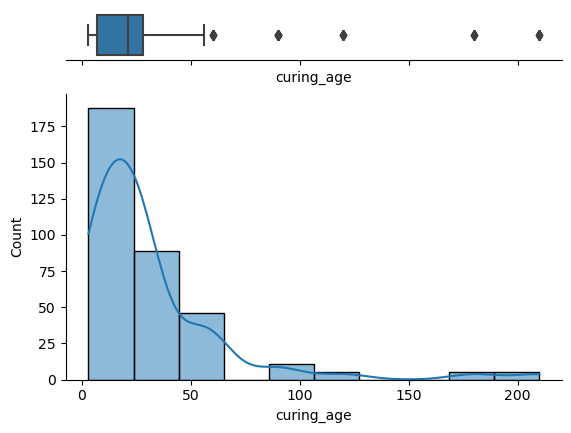

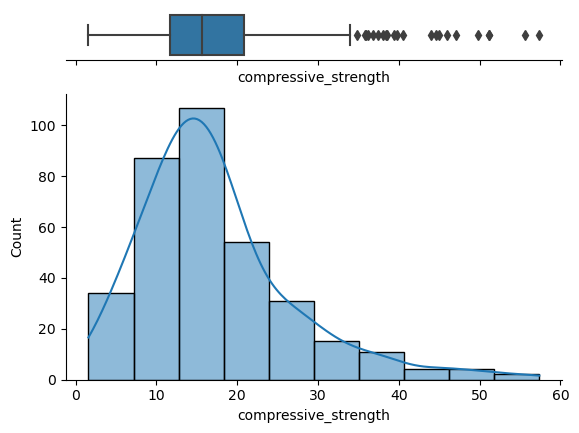

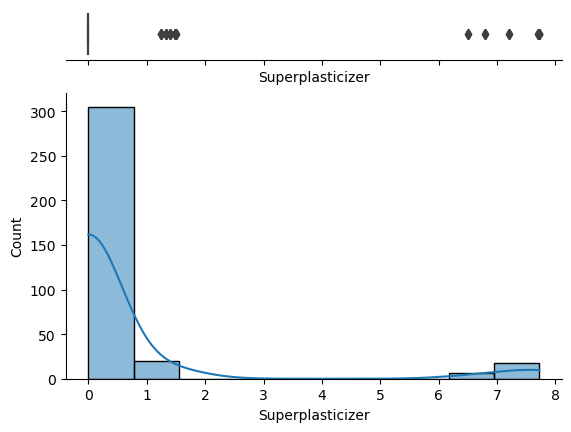

In [17]:
for column in df:
    # Create subplots with 2 rows (for boxplot and histogram), sharing the x-axis
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    # Create a histogram using Seaborn and place it in the 'ax_hist' subplot and boxplot in 'ax_box'
    sns.boxplot(data = df, x=column, ax=ax_box)
    sns.histplot(data = df, x=column, bins=10, kde=True, ax=ax_hist)

    ax_box.set(yticks=[]) # Remove y-axis ticks from the boxplot subplot
    
    sns.despine(ax=ax_hist)  # Remove top spine from the histogram subplot
    
    sns.despine(ax=ax_box, left=True) # Remove left spine from the boxplot subplot
    

### Checking the Relatonships

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


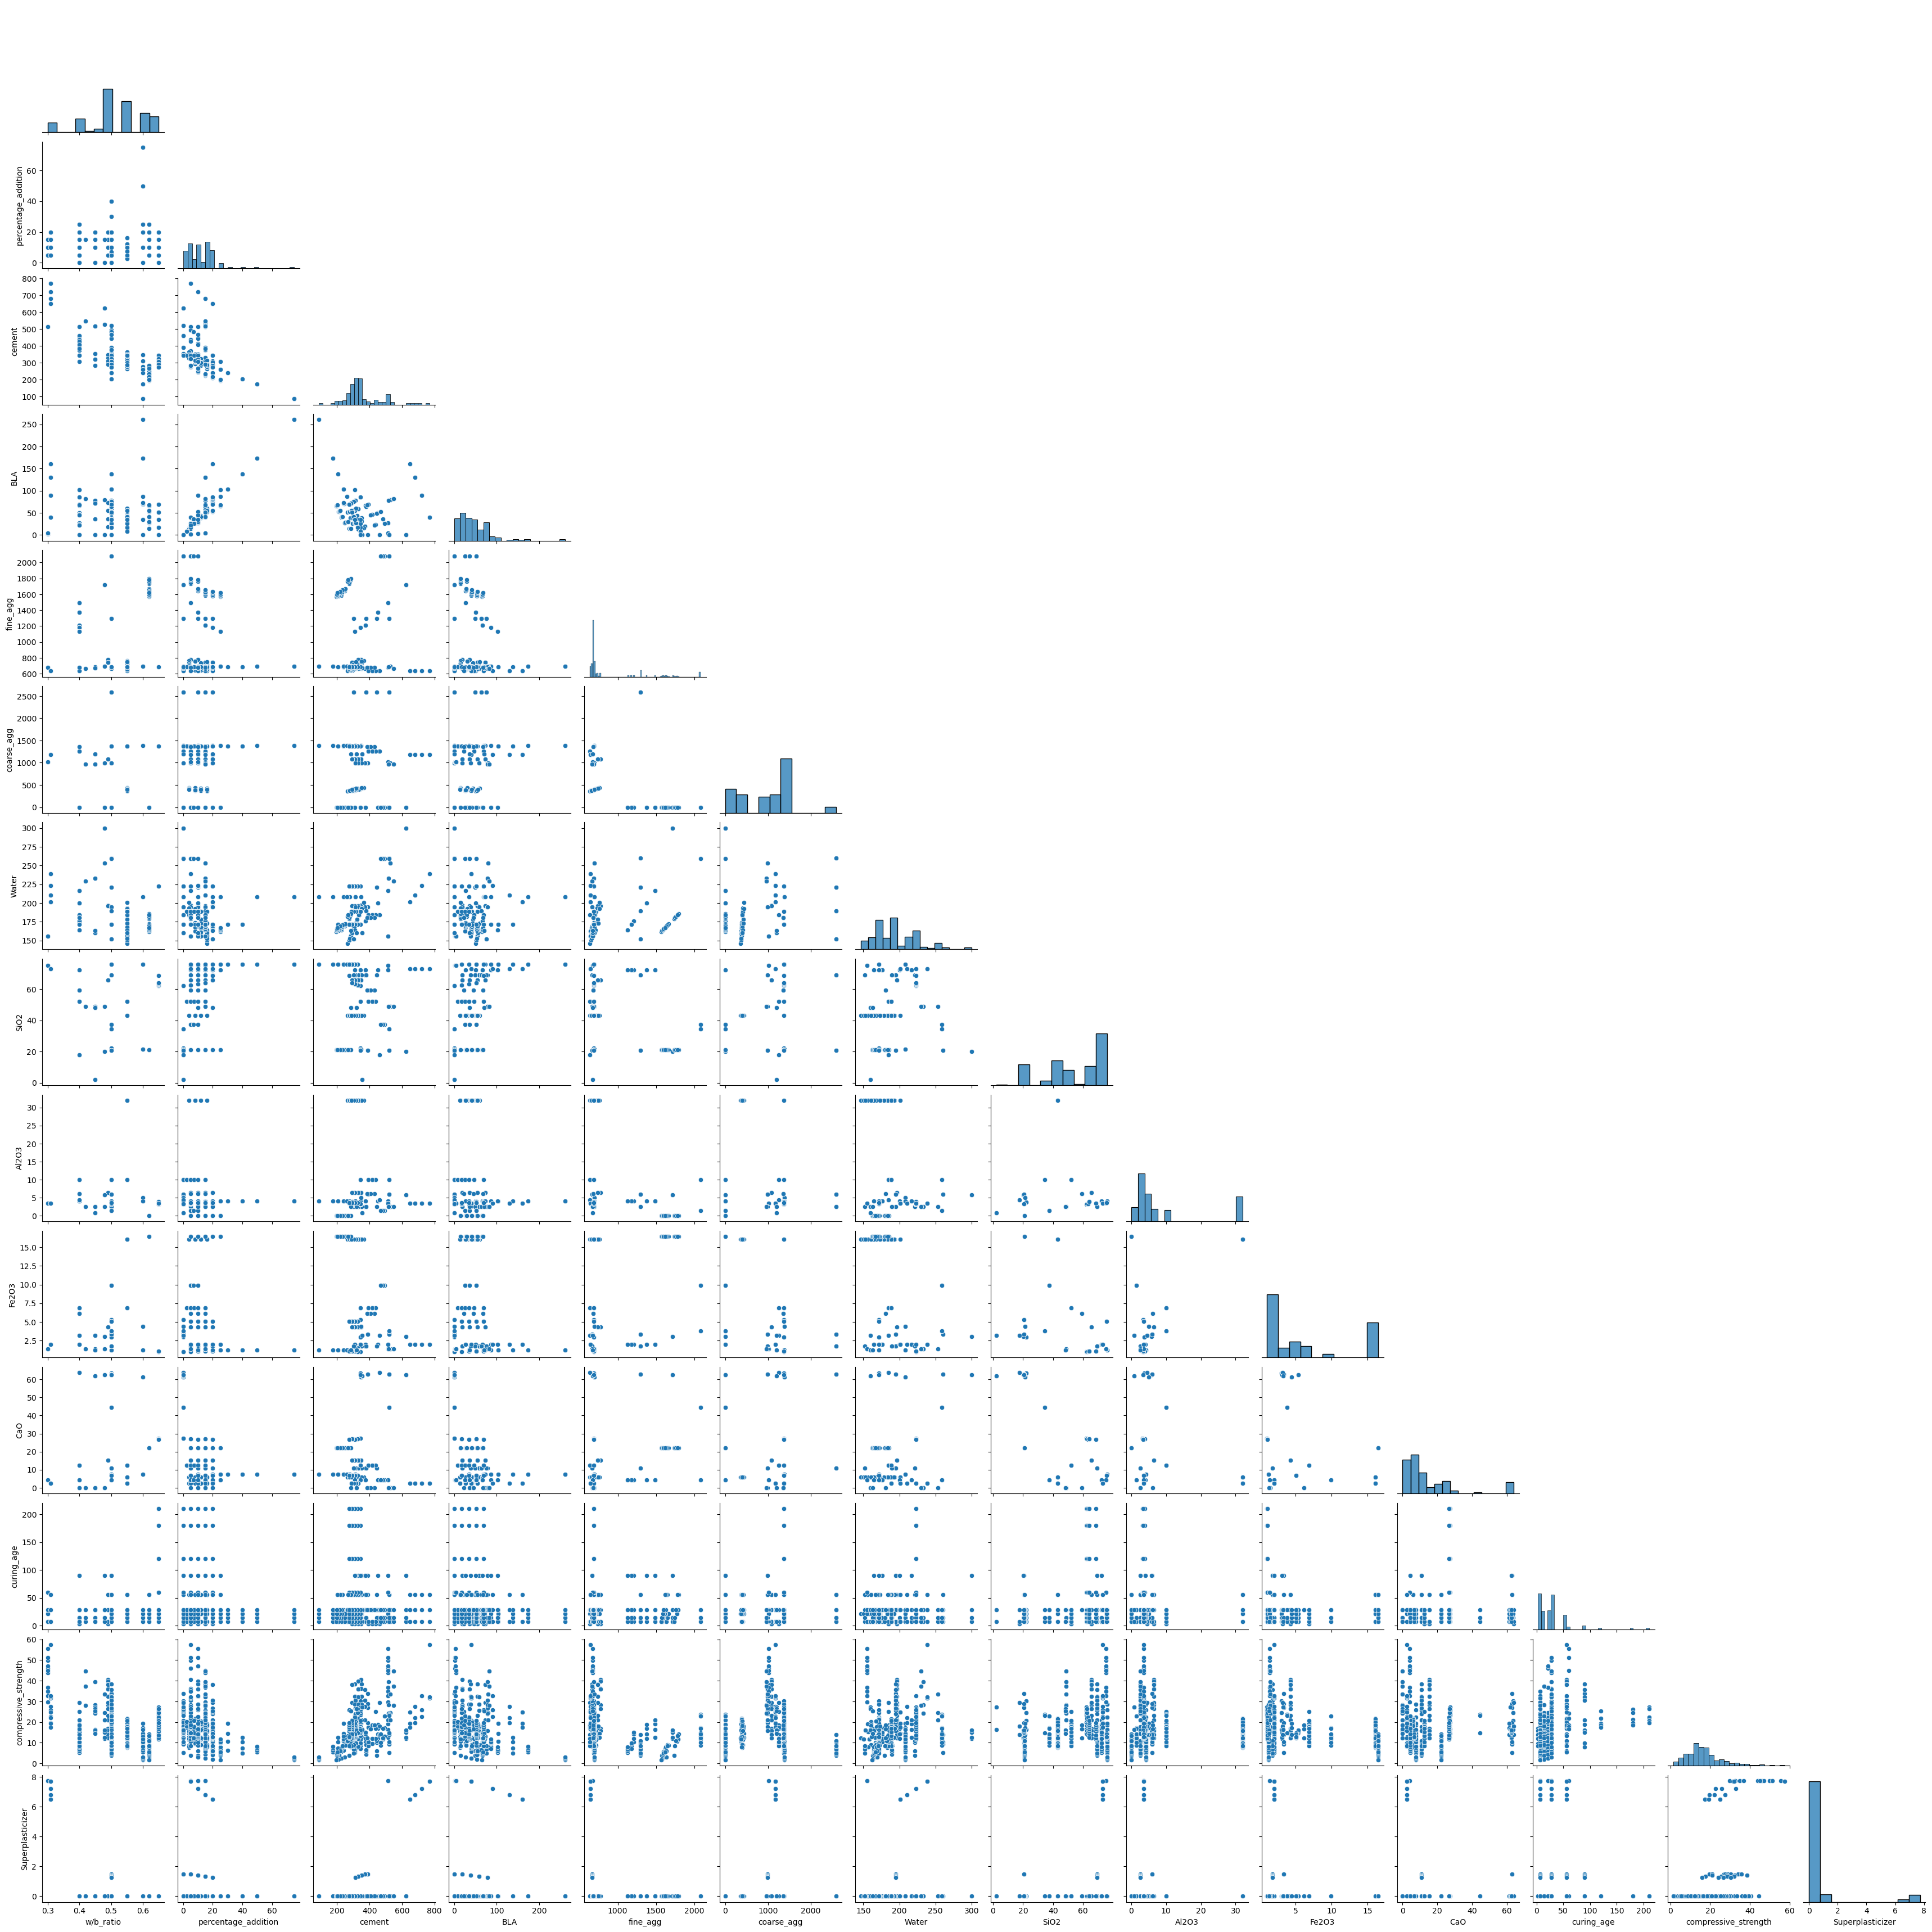

In [18]:
sns.pairplot(data=df, corner=True)
plt.show()

from this plot, we notice that;

    There's a linear relationship between BLA and percentage addition
    Linear relationship also between cement and compressive strength
    The discrete ages that compressive strength tests were performed



<Axes: title={'center': 'curing_age vs. compressive_strength'}, xlabel='curing_age', ylabel='compressive_strength'>

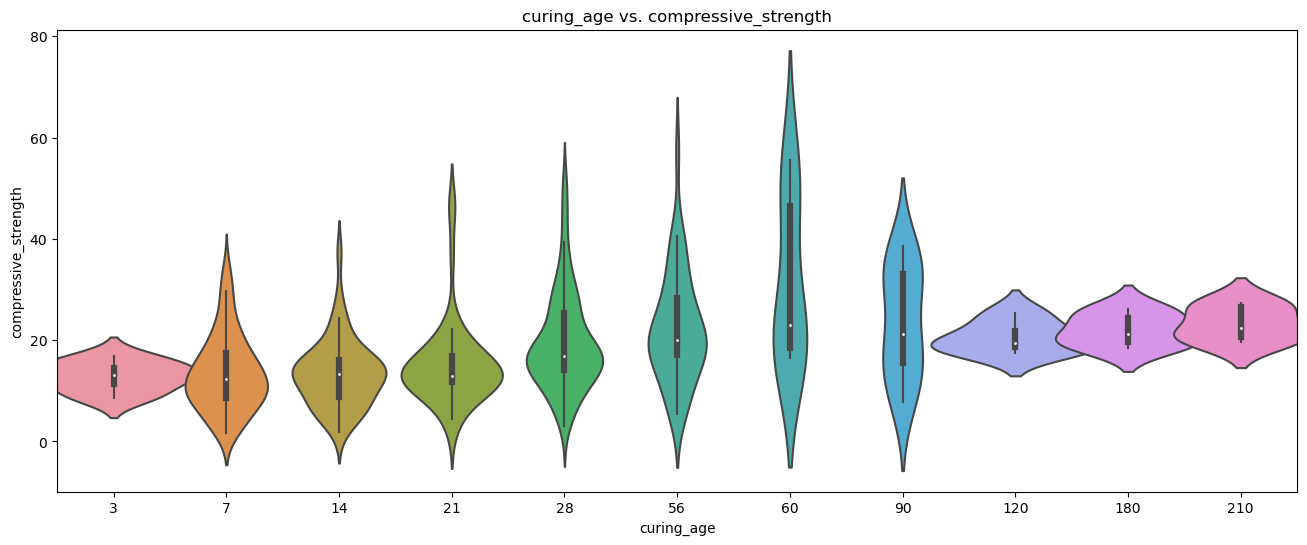

In [19]:
#Using a violin plot in vizualizing the relationship between the curing age and compressive strength.

plt.figure(figsize=(16, 6), label='curing_age vs. compressive_strength')
plt.title('curing_age vs. compressive_strength')
sns.violinplot(data=df, x="curing_age", y="compressive_strength", width=1.5, )

In [20]:
# This Correlation Matrix shows the Pearson Correlation between all variables in our datase

df.corr()

,w/b_ratio,percentage_addition,cement,BLA,fine_agg,coarse_agg,Water,SiO2,Al2O3,Fe2O3,CaO,curing_age,compressive_strength,Superplasticizer
w/b_ratio,1.000000,0.086306,-0.700992,-0.052835,0.056018,0.028688,0.140952,-0.255106,0.125288,0.280584,0.248557,0.223462,-0.439424,-0.639812
percentage_addition,0.086306,1.000000,-0.467638,0.925776,-0.075358,0.063308,-0.151727,0.394802,-0.135760,-0.145757,-0.355839,-0.063429,-0.314376,-0.046049
cement,-0.700992,-0.467638,1.000000,-0.242111,0.109769,-0.001751,0.446989,0.023386,-0.143373,-0.274509,0.029660,-0.037067,0.487377,0.610881
BLA,-0.052835,0.925776,-0.242111,1.000000,-0.086112,0.086602,-0.015211,0.433916,-0.157555,-0.216472,-0.396900,-0.066772,-0.288584,0.016097
fine_agg,0.056018,-0.075358,0.109769,-0.086112,1.000000,-0.476922,0.275440,-0.388218,-0.291800,0.220036,0.132636,-0.080028,-0.339140,-0.175341
coarse_agg,0.028688,0.063308,-0.001751,0.086602,-0.476922,1.000000,0.095368,0.365702,-0.198962,-0.509054,0.133280,0.051558,0.085713,0.045819
Water,0.140952,-0.151727,0.446989,-0.015211,0.275440,0.095368,1.000000,-0.016979,-0.274193,-0.355922,0.275336,0.166264,0.070537,-0.073027
SiO2,-0.255106,0.394802,0.023386,0.433916,-0.388218,0.365702,-0.016979,1.000000,-0.247533,-0.617579,-0.553370,0.104359,0.210085,0.286493
Al2O3,0.125288,-0.135760,-0.143373,-0.157555,-0.291800,-0.198962,-0.274193,-0.247533,1.000000,0.709625,-0.270837,-0.058914,-0.118332,-0.160376
Fe2O3,0.280584,-0.145757,-0.274509,-0.216472,0.220036,-0.509054,-0.355922,-0.617579,0.709625,1.000000,-0.167860,-0.140614,-0.331837,-0.236313


Text(0.5, 1.0, "Pearson's Correlation Heatmap")

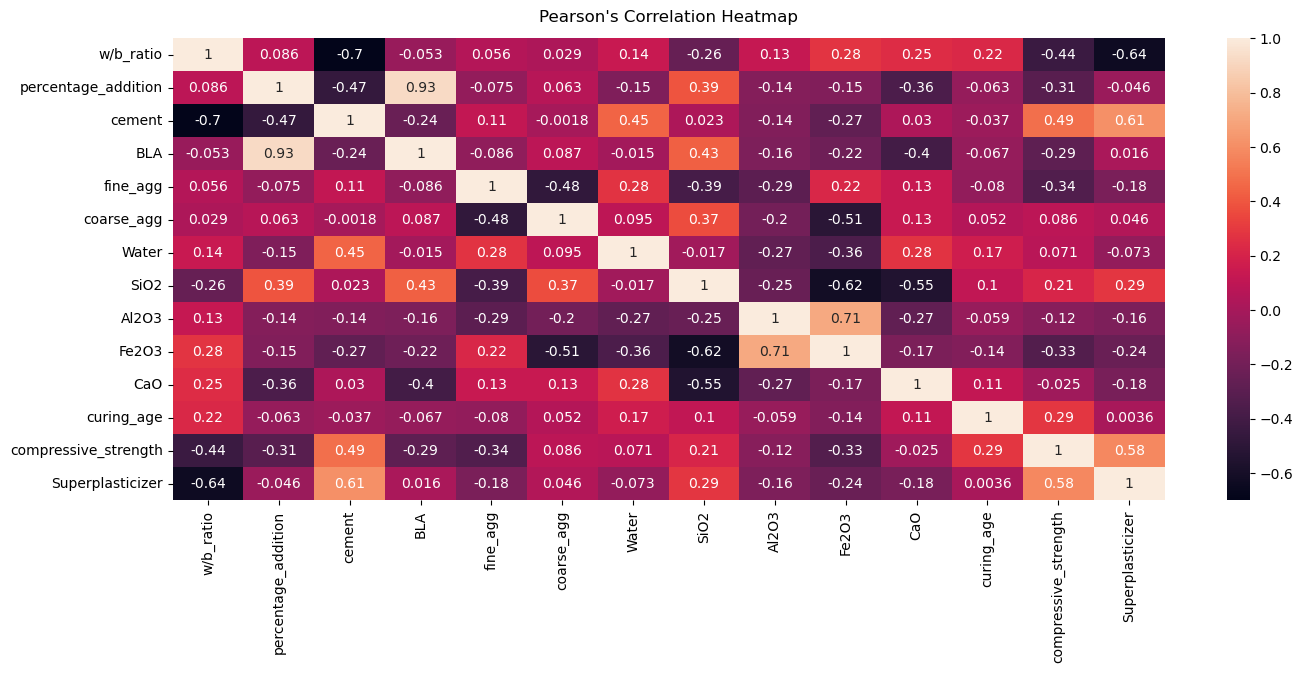

In [21]:
#Pearson Heatmap

plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), annot=True)
plt.title("Pearson's Correlation Heatmap", fontdict={'fontsize':12}, pad=12)    

Most of the relationship were strong with negative 0.7 being the highest between cement and w/b_ratio.



### Relationship between all features and the target variable

In [22]:
# Let's check the pearson's correlation between all input features and the target variable

correlations = []
for col in df.columns.drop('compressive_strength'):
    val = scipy.stats.pearsonr(df[col],df.compressive_strength)[0]
    correlations.append({
        'Feature':col,
        'Correlation with Strength':val
    })
    
pd.DataFrame(correlations).sort_values('Correlation with Strength', ascending=False)
    
    

,Feature,Correlation with Strength
12,Superplasticizer,0.579539
2,cement,0.487377
11,curing_age,0.286965
7,SiO2,0.210085
5,coarse_agg,0.085713
6,Water,0.070537
10,CaO,-0.025400
8,Al2O3,-0.118332
3,BLA,-0.288584
1,percentage_addition,-0.314376


In [23]:
df.columns

Index(['w/b_ratio', 'percentage_addition', 'cement', 'BLA', 'fine_agg',
       'coarse_agg', 'Water', 'SiO2', 'Al2O3', 'Fe2O3', 'CaO', 'curing_age',
       'compressive_strength', 'Superplasticizer'],
      dtype='object')

## Data Preparation for Training

In [24]:
# Importing the necessary Librares

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from catboost import CatBoostRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [25]:
#defining the input and target varables

input_columns =df.columns.drop('compressive_strength')
inputs = df[input_columns]
targets = df['compressive_strength']

In [26]:
inputs

,w/b_ratio,percentage_addition,cement,BLA,fine_agg,coarse_agg,Water,SiO2,Al2O3,Fe2O3,CaO,curing_age,Superplasticizer
4,0.49,5.0,346.500000,18.250000,778.000000,1086.000000,196.740000,65.66,6.41,4.28,15.22,3,0.0
5,0.49,5.0,346.500000,18.250000,778.000000,1086.000000,196.740000,65.66,6.41,4.28,15.22,7,0.0
6,0.49,5.0,346.500000,18.250000,778.000000,1086.000000,196.740000,65.66,6.41,4.28,15.22,28,0.0
7,0.49,5.0,346.500000,18.250000,778.000000,1086.000000,196.740000,65.66,6.41,4.28,15.22,56,0.0
8,0.49,10.0,328.500000,36.500000,778.000000,1086.000000,196.440000,65.66,6.41,4.28,15.22,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,0.50,20.0,274.285714,68.571429,685.714286,1371.428571,171.428571,75.69,3.64,5.06,6.74,21,0.0
640,0.50,20.0,274.285714,68.571429,685.714286,1371.428571,171.428571,75.69,3.64,5.06,6.74,28,0.0
642,0.40,5.0,429.227273,22.590909,677.727273,1355.454545,180.727273,59.20,6.14,6.14,0.00,28,0.0
643,0.40,10.0,406.636364,45.181818,677.727273,1355.454545,180.727273,59.20,6.14,6.14,0.00,28,0.0


In [27]:
targets

4      16.84
5      28.33
6      36.17
7      40.57
8      15.69
       ...  
639    12.53
640    12.74
642    18.60
643    16.50
644    12.30
Name: compressive_strength, Length: 349, dtype: float64

### Splitting the data into Train, Test and Validation Data

In [28]:
# Splitting data into train (70%), test (20%) and Validation(10%)

X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.25, random_state=23)

# Further splitting the train data into train (70%) and validation (30%)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)


In [29]:
# Min/Max Scaling of numeric features

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

## Training the Model

In [30]:
# The models to be used are Ridge Regression, Decision Trees, Random Forest and CatBoost

models = {
    'Ridge Regression': Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'CATBoost': CatBoostRegressor(silent=True)
}

results = {'Model': [], 'Mean RMSE': [], 'Mean R2': []}

kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Define your k-fold

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")
    cv_mean_rmse = np.sqrt(-scores.mean())
    
    r2_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring="r2")
    cv_r2_mean = np.mean(r2_scores)
    
    results['Model'].append(model_name)
    results['Mean RMSE'].append(cv_mean_rmse)
    results['Mean R2'].append(cv_r2_mean)

results_df = pd.DataFrame(results).sort_values('Mean R2', ascending=False)
print(results_df)

              Model  Mean RMSE   Mean R2
3          CATBoost   4.091769  0.789933
2     Random Forest   4.628118  0.743909
1     Decision Tree   5.503596  0.535223
0  Ridge Regression   6.263460  0.520723


The best performing model is CATBoost therefore we will tune its parameters to further enhance its performance

### Hyperparameter tuning for CATBoost

In [31]:
# Define a helper function to use K-fold CV to test hyperparameters
def TestCatBoostParams(**params):
    score = cross_val_score(CatBoostRegressor(**params, thread_count=-1, random_state=23, verbose=False), X_train, y_train, cv= kf, scoring="r2")
    
    print("Mean R-squared from K-fold CV with {} is {}".format(params, round(np.mean(score), 4)))

    

### Optimizing estimators

In [32]:
#Optimizing the estimators

estimators = [1,2,4,8,16,32,64,128]
for n in estimators:
    TestCatBoostParams(n_estimators=n)

Mean R-squared from K-fold CV with {'n_estimators': 1} is 0.1437
Mean R-squared from K-fold CV with {'n_estimators': 2} is 0.3271
Mean R-squared from K-fold CV with {'n_estimators': 4} is 0.504
Mean R-squared from K-fold CV with {'n_estimators': 8} is 0.6672
Mean R-squared from K-fold CV with {'n_estimators': 16} is 0.74
Mean R-squared from K-fold CV with {'n_estimators': 32} is 0.7545
Mean R-squared from K-fold CV with {'n_estimators': 64} is 0.7889
Mean R-squared from K-fold CV with {'n_estimators': 128} is 0.7879


In [33]:
#optimizing estimators

estimators = [127, 128, 129, 130, 131, 132, 133]
for n in estimators:
    TestCatBoostParams(n_estimators=n)

Mean R-squared from K-fold CV with {'n_estimators': 127} is 0.7798
Mean R-squared from K-fold CV with {'n_estimators': 128} is 0.7879
Mean R-squared from K-fold CV with {'n_estimators': 129} is 0.7773
Mean R-squared from K-fold CV with {'n_estimators': 130} is 0.7894
Mean R-squared from K-fold CV with {'n_estimators': 131} is 0.7896
Mean R-squared from K-fold CV with {'n_estimators': 132} is 0.7769
Mean R-squared from K-fold CV with {'n_estimators': 133} is 0.7765


### Optimzing Max_depth

In [34]:
depths = [1, 2, 4, 8, 10]
for n in depths:
    TestCatBoostParams(n_estimators = 128, max_depth = n)

Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 1} is 0.6636
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 2} is 0.7522
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4} is 0.7873
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 8} is 0.7419
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 10} is 0.7595


In [35]:
depths =[3, 4, 5, 6, 7]
for n in depths:
    TestCatBoostParams(n_estimators = 128, max_depth = n)

Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 3} is 0.7786
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4} is 0.7873
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 5} is 0.7945
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 6} is 0.7879
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 7} is 0.7667


### Optimizing Learning_rate

In [36]:
rates =[.2, .3, .4, .5, .6]
for n in rates:
    TestCatBoostParams(n_estimators = 128, max_depth = 4, learning_rate = n)

Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.2} is 0.7735
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.3} is 0.7785
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.4} is 0.7612
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.5} is 0.7702
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.6} is 0.7713


In [37]:
rates =[.5, .50025, .5005]
for n in rates:
    TestCatBoostParams(n_estimators = 128, max_depth = 4, learning_rate = n)

Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.5} is 0.7702
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.50025} is 0.7839
Mean R-squared from K-fold CV with {'n_estimators': 128, 'max_depth': 4, 'learning_rate': 0.5005} is 0.7956


## Training CatBoostRegressor with Optimized Hyperparameters

In [38]:
model = CatBoostRegressor(n_estimators = 128, max_depth = 4, learning_rate = .5, thread_count=-1, random_state = 23, verbose=False)

In [39]:
model.fit(X_train, y_train)

### Using the Model to Make Predictions on our Test set

We now put our model to use to predict the strengths in the test dataset and get some corresponding scores to see how well it performed.

In [40]:
preds = model.predict(X_test)
r_squared = r2_score(y_test, preds)
MSE = mean_squared_error(y_test, preds)
RMSE = np.sqrt(mean_squared_error(y_test, preds))
MAE = mean_absolute_error(y_test, preds)

print('Our Optimized CatBoostRegressor got the following scores on the test set:')
print('R-squared: {}'.format(r_squared))
print('MSE: {}'.format(MSE))
print('RMSE: {}'.format(RMSE))
print('MAE: {}'.format(MAE))

Our Optimized CatBoostRegressor got the following scores on the test set:
R-squared: 0.9347723917196288
MSE: 8.297716395400137
RMSE: 2.8805757055491767
MAE: 1.8534958342705445


## R-squared of .9348

We can be quite pleased with this result as this can be interpreted as: 

Our model can account for 93.48% of the variance in the data.

mean actual value :17.97451818181818
mean predicted value :17.341191559247747
Difference between the actual and the predicted:0.6333266225704357


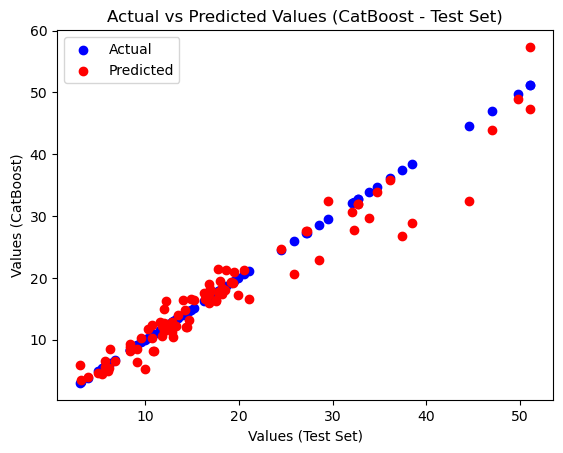

In [47]:

y_test_pred = model.predict(X_test)


coefficients = np.polyfit(y_test,y_test_pred,1)
line_of_best_fit = np.polyval(coefficients,y_test)
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df_results['Difference'] = df_results['Actual'] - df_results['Predicted']
actual_mean = df_results['Actual'].mean()
predicted_mean = df_results['Predicted'].mean()
difference = df_results['Difference'].mean()

print(f'mean actual value :{actual_mean}')
print(f'mean predicted value :{predicted_mean}')
print(f'Difference between the actual and the predicted:{difference}')

plt.scatter(y_test, y_test, color='blue', label='Actual')
plt.scatter(y_test, y_test_pred, color='red', label='Predicted')
plt.xlabel('Values (Test Set)')
plt.ylabel('Values (CatBoost)')
plt.title('Actual vs Predicted Values (CatBoost - Test Set)')
plt.legend()
plt.show()

### Feature Importances

Here we get a look at how much each input variable factored in to our final model.

In [41]:
# Create a dataframe showing the feature importances

importances = pd.DataFrame({
    'Feature': inputs.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)
importances

,Feature,Importance
11,curing_age,21.441602
12,Superplasticizer,15.072684
4,fine_agg,12.423024
0,w/b_ratio,8.024754
9,Fe2O3,7.553178
5,coarse_agg,7.265110
10,CaO,6.425424
3,BLA,6.079697
8,Al2O3,4.850769
1,percentage_addition,3.956064


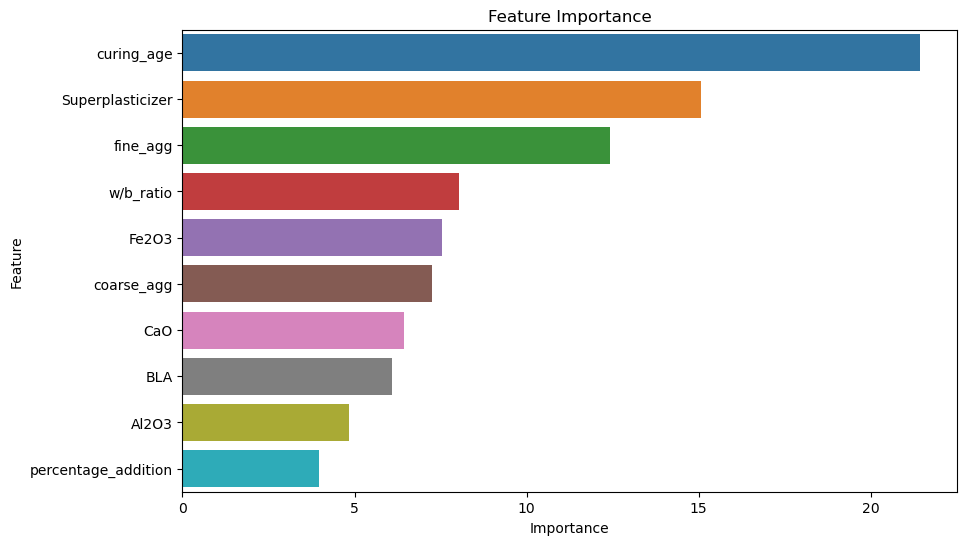

In [42]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importances.head(10), x='Importance', y='Feature');

### Using shapley to also check for the feature importance

In [43]:
import shap

In [44]:
# Using 'model' is your trained model and 'inputs' is your feature data

explainer = shap.Explainer(model)
shap_values = explainer.shap_values(inputs)

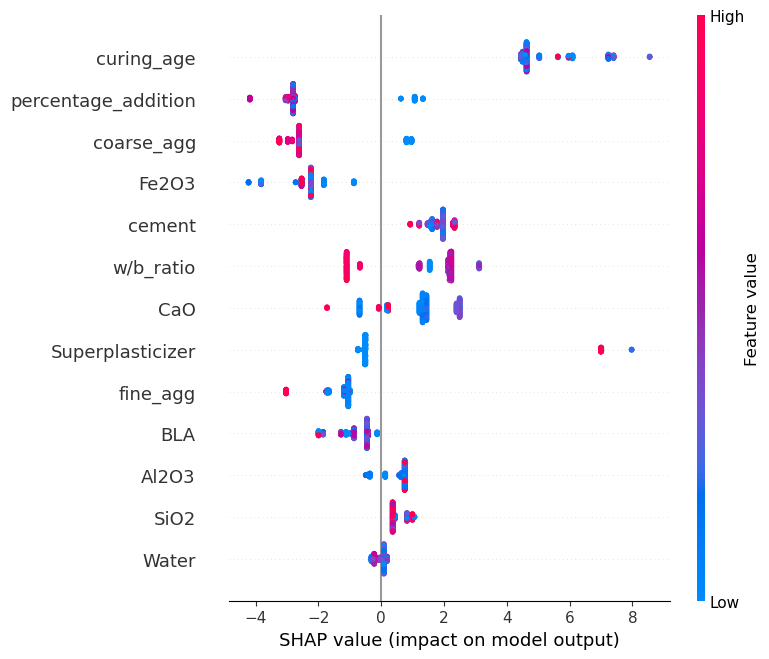

In [45]:
# Create a summary plot
shap.summary_plot(shap_values, inputs, feature_names=inputs.columns, show=False)
plt.show()

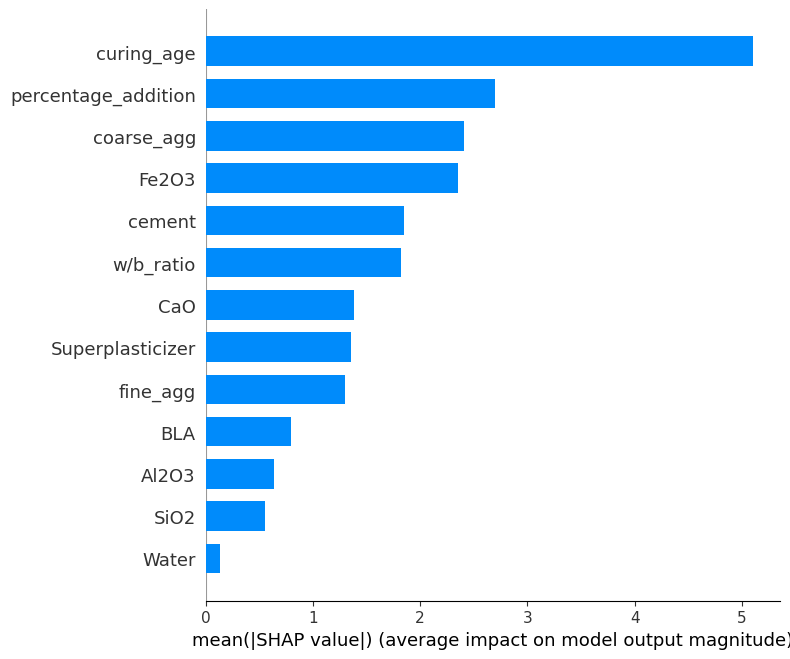

In [46]:
# Create a summary plot with a histogram

shap.summary_plot(shap_values, inputs, plot_type='bar', feature_names=inputs.columns, show=False)
plt.show()